# Student Performance in Exams

<img src='https://c.tenor.com/Yu3V6PJCMVUAAAAd/exam-mr-bean.gif'>

**Ahh, exams again.** <br>

## Context
This dataset is taken form the [source](http://roycekimmons.com/tools/generated_data/exams)<br>
This data set consists of the marks secured by the students in various subjects.

## Insights would be:<br>
How effective is the test preparation course?<br>
Which major factors contribute to test outcomes?<br>
What would be the best way to improve student scores on each test?<br>

### Let's have a look at the data

In [18]:
# import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px

In [19]:
data = pd.read_csv('dataset/exams.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


So, the names of column explains pretty much about the data.<br>
Let's check for null values and overview of data.<br>

In [20]:
print("We have ",data.shape[1]," columns with ",data.shape[0]," rows in the dataset")

We have  8  columns with  1000  rows in the dataset


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [22]:
# display categorical variables in dataset
data.columns[:4]

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch'], dtype='object')

In [23]:
# checking null values
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Wow, no missing values!

In [24]:
fig = px.histogram(data,
                   x="gender",
                   title='Histogram of Gender',
                   text_auto=True)
fig.update_traces(textposition='outside')
fig.show()

**Apparently, there are slightly more number of female than male in this dataset.**

In [25]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [27]:
# checking race/ethnicity with gender
fig = px.histogram(data,
                   x="race/ethnicity",
                   title='Histogram of race/ethnicity according to gender',
                   color='gender',          
                   text_auto=True)
fig.update_traces(textposition='outside')
fig.update_xaxes(categoryorder='total ascending')

**We can say, there are more females in  Group B and Group C.**

In [28]:
# Let's check if Lunch affect student math score

fig = px.box(data, x="lunch", y='math score', color="gender")
fig.show()

In [29]:
# Let's check if Lunch affect student reading score

fig = px.box(data, x="lunch", y='reading score', color="gender")
fig.show()

In [30]:
# Let's check if Lunch affect student writing score

fig = px.box(data, x="lunch", y='writing score', color="gender")
fig.show()

**So, clearly lunch is effective way to have a good score. Of course good nutrients will help. ;)**

In [31]:
# Let's consider minimum passing marks to for score analysis.
min_passmarks = 40

In [32]:
fig = px.histogram(data,
                   x="test preparation course",
                   title='Count of test preparation course',
                   color='test preparation course',
                   text_auto=True)
fig.update_traces(textposition='outside')
fig.update_xaxes(categoryorder='total ascending')

Hence, about 65% students didn't complete the test preparation course. <br>
Let's check the pattern with each score. <br>

In [33]:
data['Math_PassStatus'] = np.where(data['math score'] < min_passmarks, 'F', 'P')
data.Math_PassStatus.value_counts()

P    960
F     40
Name: Math_PassStatus, dtype: int64

4% student failed in Match

In [34]:
fig = px.box(data, x="test preparation course", y="math score", color="gender")
fig.show()

**The students who completed test preparation couse are likely to score more than students who don't in Math.**

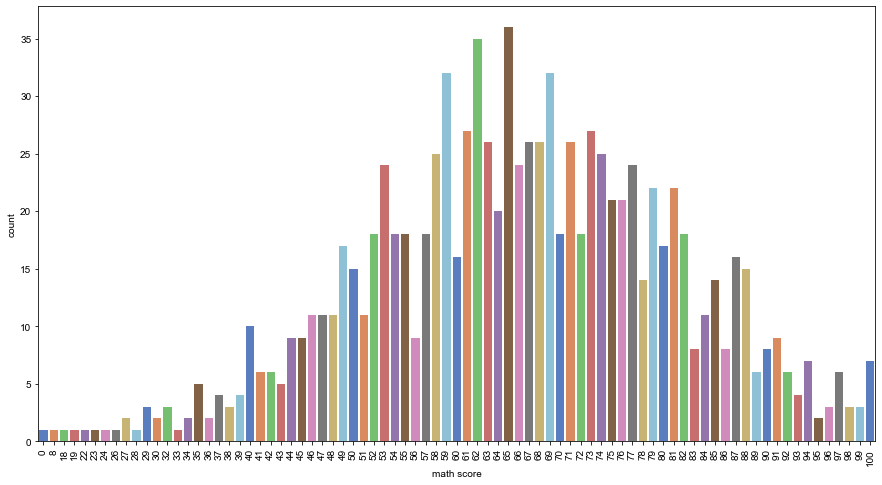

In [35]:
fig = plt.figure(figsize=(15,8))
ax = sns.countplot(x="math score", data = data, palette='muted')
sns.set_style('whitegrid')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

**So, maximum student count is 37 who scored 66 marks.**

Let's check for reading

In [36]:
data['Read_PassStatus'] = np.where(data['reading score'] < min_passmarks, 'F', 'P')
data.Read_PassStatus.value_counts()

P    974
F     26
Name: Read_PassStatus, dtype: int64

- That's good, very few students failed in reading

In [37]:
fig = px.box(data, x="test preparation course", y="reading score", color="gender")
fig.show()

**Students who completed test preparation course are more likely to score 80 and above marks in Reading.**

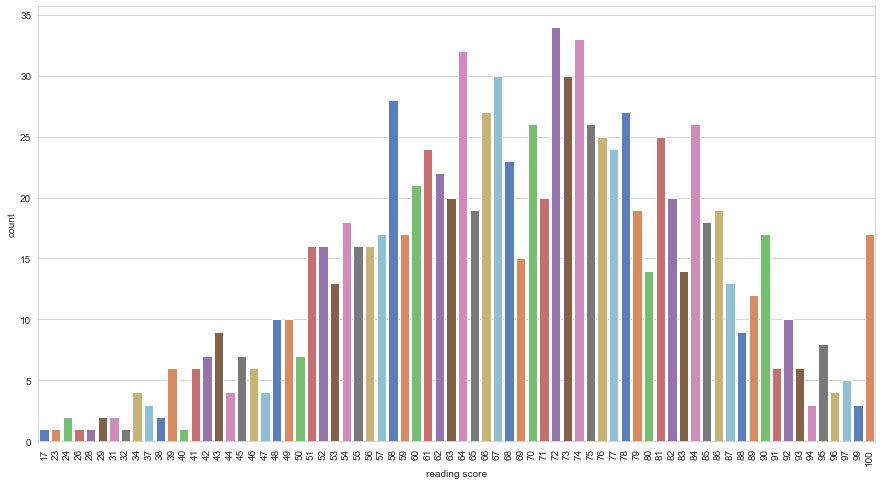

In [38]:
fig = plt.figure(figsize=(15,8))
ax = sns.countplot(x="reading score", data = data, palette='muted')
sns.set_style('whitegrid')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

**Similar to maths, the highest score most students (about 34) got is 72 marks.**

In [39]:
data['Write_PassStatus'] = np.where(data['writing score'] < min_passmarks, 'F', 'P')
data.Write_PassStatus.value_counts()

P    968
F     32
Name: Write_PassStatus, dtype: int64

- About 3% students failed in Writing

In [40]:
fig = px.box(data, x="test preparation course", y="writing score", color="gender")
fig.show()

**Students who completed test preparation course are more likely to score 79 and above marks in Writing.**

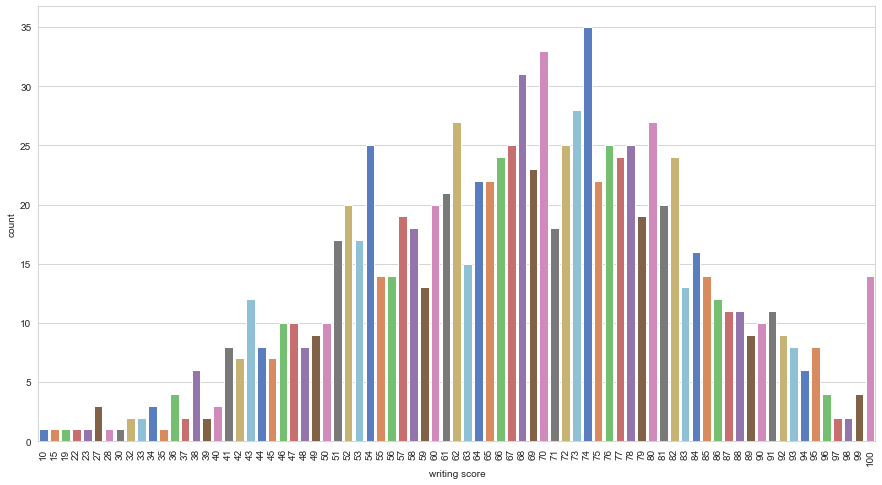

In [41]:
fig = plt.figure(figsize=(15,8))
ax = sns.countplot(x="writing score", data = data, palette='muted')
sns.set_style('whitegrid')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

**35 students scored most common score of 74 marks in Writing**

- How many students passed in all the subjects ?

In [42]:
data['grade_status'] = data.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or
                                      x['Read_PassStatus'] == 'F' or 
                                      x['Write_PassStatus'] == 'F' else 'P', axis =1)

data.grade_status.value_counts()

P    949
F     51
Name: grade_status, dtype: int64

In [43]:
data['Total_Marks'] = data['math score'] + data['reading score'] + data['writing score']
data['percent'] = data['Total_Marks'] / 3

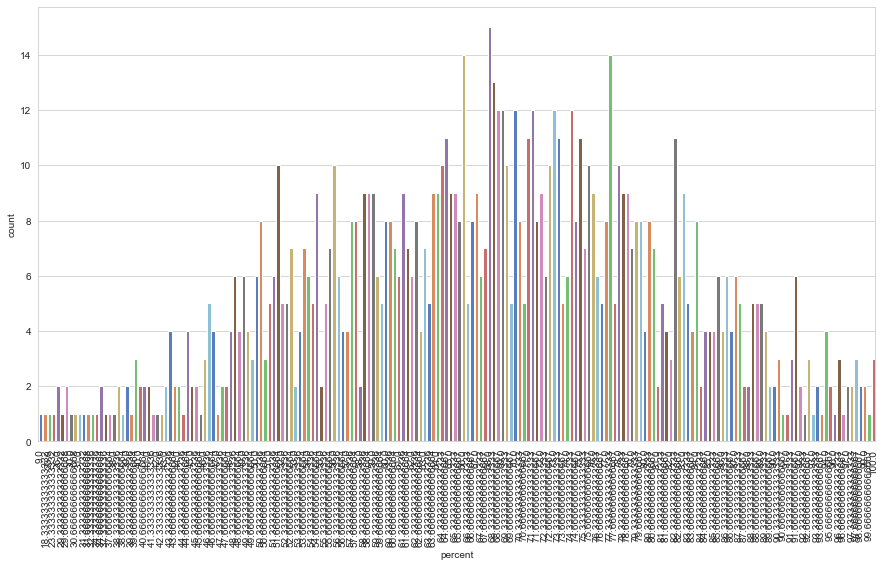

In [44]:
fig = plt.figure(figsize=(15,8))
ax = sns.countplot(x="percent", data = data, palette='muted')
sns.set_style('whitegrid')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

Can't really see, let's assign students grades, according to their marks

**above 80 = A Grade<br>
70 to 80 = B Grade<br>
60 to 70 = C Grade<br>
50 to 60 = D Grade<br>
40 to 50 = E Grade<br>
below 40 = F Grade ( means Fail )<br>**

In [45]:
def grade(percent, grade_status):
    if (grade_status == 'F'):
        return 'F'    
    if (percent >= 80 ):
        return 'A'
    if (percent >= 70):
        return 'B'
    if (percent >= 60):
        return 'C'
    if (percent >= 50):
        return 'D'
    if (percent >= 40):
        return 'E'
    else: 
        return 'F'

data['Grade'] = data.apply(lambda x : grade(x['percent'], x['grade_status']), axis=1)

data.Grade.value_counts()

B    261
C    256
A    198
D    178
E     56
F     51
Name: Grade, dtype: int64

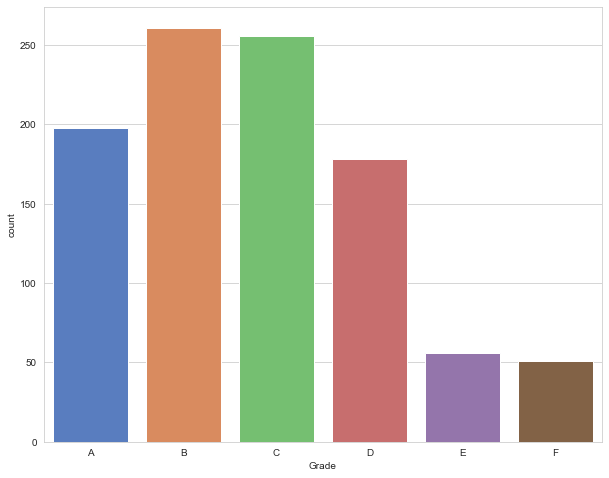

In [46]:
fig = plt.figure(figsize=(10,8))
ax = sns.countplot(x="Grade", data = data, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

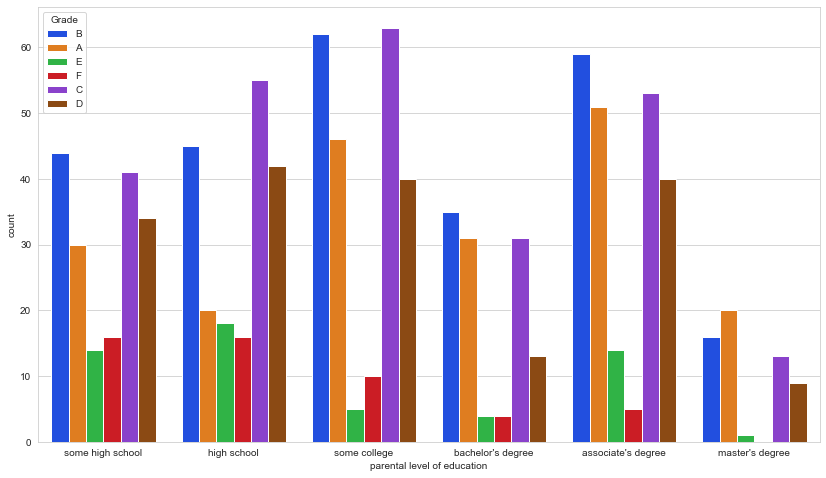

In [47]:
fig = plt.figure(figsize=(14,8))
p = sns.countplot(x='parental level of education', 
                  data = data, 
                  order=["some high school", "high school", 
                         "some college", "bachelor's degree",
                         "associate's degree","master's degree"], 
                  
                  hue='Grade', 
                  palette='bright')

# _ = plt.setp(p.get_xticklabels(), rotation=90) 

## Conclusion

**Few inferences can be- <br>**

Gender has no correlation with the score. <br>
Finishing preparation course is benefitial. <br>
Having lunch is important to students, and it is also the most significant one. <br>
Parents' education level may affect the performance of students, but not the important one. <br>

So, students should have enough nutrient and make efforts and complete test preparation, if they want to have good performance,  . <br>